In [1]:
from event_generator import Events

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
def plot(events):
    fig, ax = plt.subplots(figsize=(20,1))
    plt.plot(events, np.zeros_like(events), 'or', marker='|', markersize=15)
    xfmt = mdates.DateFormatter('%d-%m-%y %H:%M:%S')
    ax.xaxis.set_major_formatter(xfmt)
    ax.set_yticklabels([])
    plt.grid()
#     plt.savefig("example1.png", bbox_inches='tight')
    plt.show()

In [3]:
def sin_signal(t, period1, period2, phase=0, m=1):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

def pulse_wave(t, period1, period2, phase=0):
    return (t-phase)%(period1+period2)>period1

def one(t, *args):
    return 1

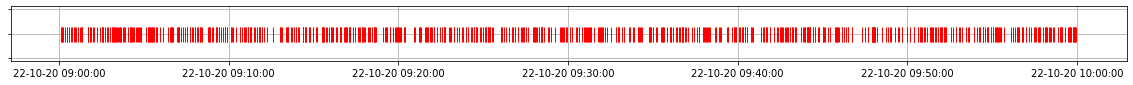

In [4]:
a = Events(1/5, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], one, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

# Проверка пуассоновости событий

Времена между событиями подчиняются экспоненциальному распределению $Exp(\lambda)$

Для $Exp(\lambda)\;\;$: $\displaystyle\mathbb{E}[X^n]=\frac{n!}{\lambda^n}$

$\displaystyle\lambda_n=\sqrt[n]{\frac{n!}{\mathbb{E}[X^n]}}$


In [5]:
import random
from IPython.display import HTML, display
import tabulate
from event_generator import Check_Poissoness

m0 = []
m1 = []
m2 = []
m3 = []
for n in range(5):
    m = random.random()*100
    a = Events(1/5, [['2020-10-22 08:15:27.243860','2020-10-22 08:27:00.713311']], one, 300, 100)
    l0, l1, l2, l3 = Check_Poissoness(a)
    m0.append(l0)
    m1.append(l1)
    m2.append(l2)
    m3.append(l3)

table = [["m", *m0],
         ["$\lambda_1$",*m1],
         ["$\lambda_2$",*m2],
         ["$\lambda_3$",*m3]]
table = map(list, zip(*table)) #транспонирование
display(HTML(tabulate.tabulate(table, tablefmt='html')))

m,$\lambda_1$,$\lambda_2$,$\lambda_3$
0.2,0.26337264052576476,0.30392958785278945,0.34122561397551643
0.2,0.247866007169391,0.28896804512969354,0.33166084001366886
0.2,0.3242034234568122,0.3730949825847625,0.4184440611349751
0.2,0.24952540429659478,0.2741188707748541,0.30745337614194546
0.2,0.28493392750118085,0.31534886968628584,0.34751290815488406


# Pulse wave

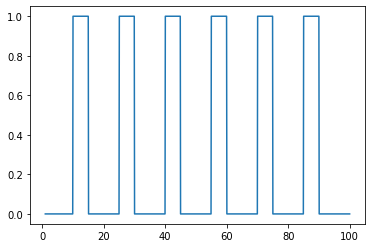

In [6]:
x = np.linspace(1, 100, 1000)
plt.plot(x, pulse_wave(x, 10, 5))
plt.show()

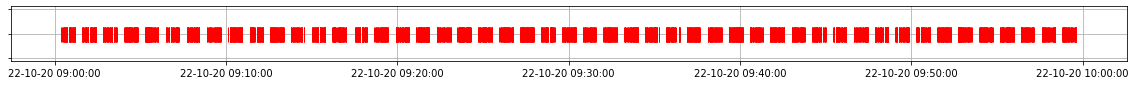

In [7]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], pulse_wave, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)

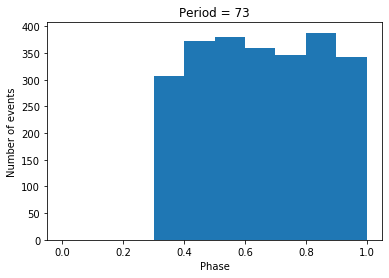

In [8]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

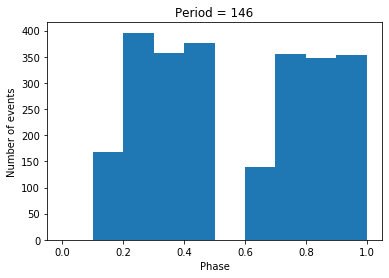

In [9]:
period = 2*73
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

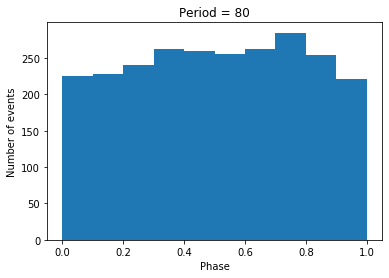

In [10]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 10, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()


# Сигнал сложной формы

In [11]:
def sin_signal(t, period1, period2, phase=0, m=0.3):
    period = period1 + period2
    return 1-m*(1-np.sin(2*np.pi*t/period+phase))

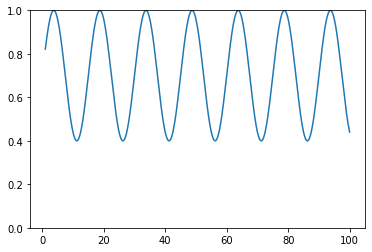

In [12]:
x = np.linspace(1, 100, 1000)
plt.plot(x, sin_signal(x, 10, 5))
plt.ylim(0, 1)
plt.show()

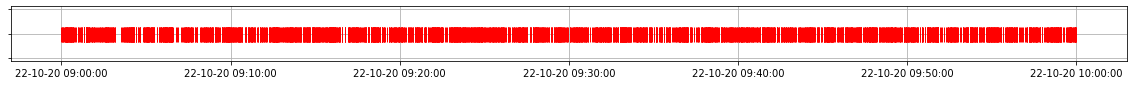

In [13]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], sin_signal, 23, 50)
plot(a.events)
evnts = np.array(a.events_in_seconds)
evnts_sin = evnts

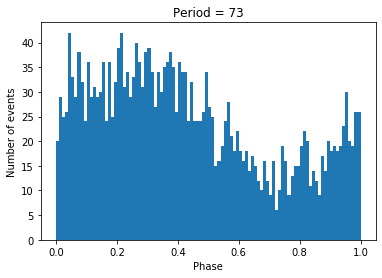

In [14]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

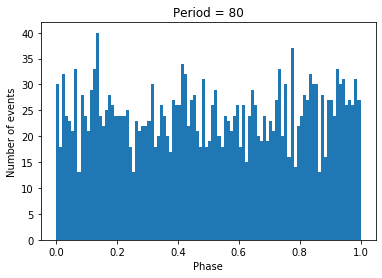

In [15]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

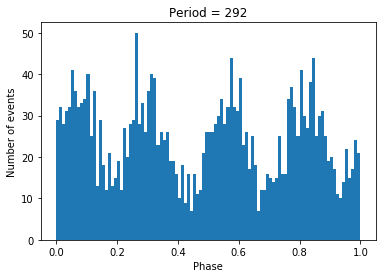

In [16]:
period = 73*4
n, bins, patches = plt.hist(evnts%period/period, 100, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()

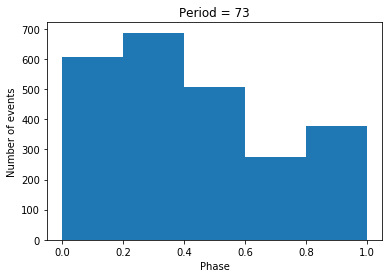

[606. 687. 507. 276. 376.]


227.0497553017945

In [17]:
period = 73
n, bins, patches = plt.hist(evnts%period/period, 5, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()
print(n)
e = sum(n)/5
np.sum((n-e)**2/e)

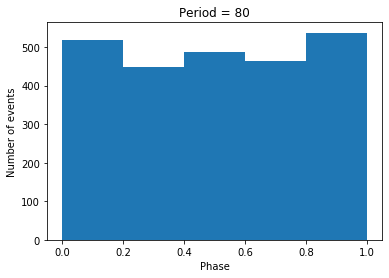

[518. 447. 487. 463. 537.]


11.3768352365416

In [18]:
period = 80
n, bins, patches = plt.hist(evnts%period/period, 5, range=(0,1))
plt.xlabel('Phase')
plt.ylabel('Number of events')
plt.title('Period = ' + str(period))
plt.show()
print(n)
e = sum(n)/5
np.sum((n-e)**2/e)

In [22]:
per[np.argmax(stat)]
np.max(stat)
stat[171]

5.442903752039152

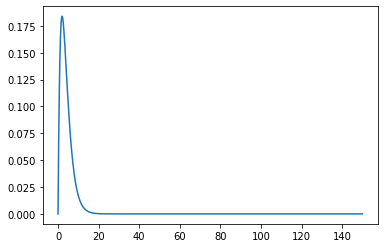

0.08950743891988437

In [23]:
from scipy.stats import chi2
x = np.linspace(0, 150, 1000)
plt.plot(x, chi2.pdf(x,4))
plt.show()
chi2.pdf(stat[171],4)

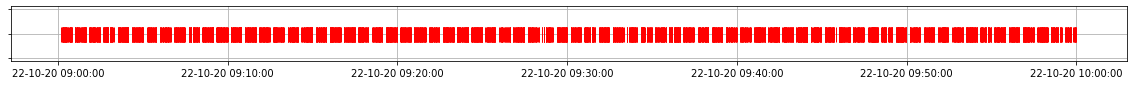

In [24]:
a = Events(1, [['2020-10-22 09:00:00.000000','2020-10-22 10:00:00.000000']], pulse_wave, 10, 40)
plot(a.events)
evnts = np.array(a.events_in_seconds)

In [25]:
per, stat = find_period(evnts, chi_2, fold, 5, 10, 200)

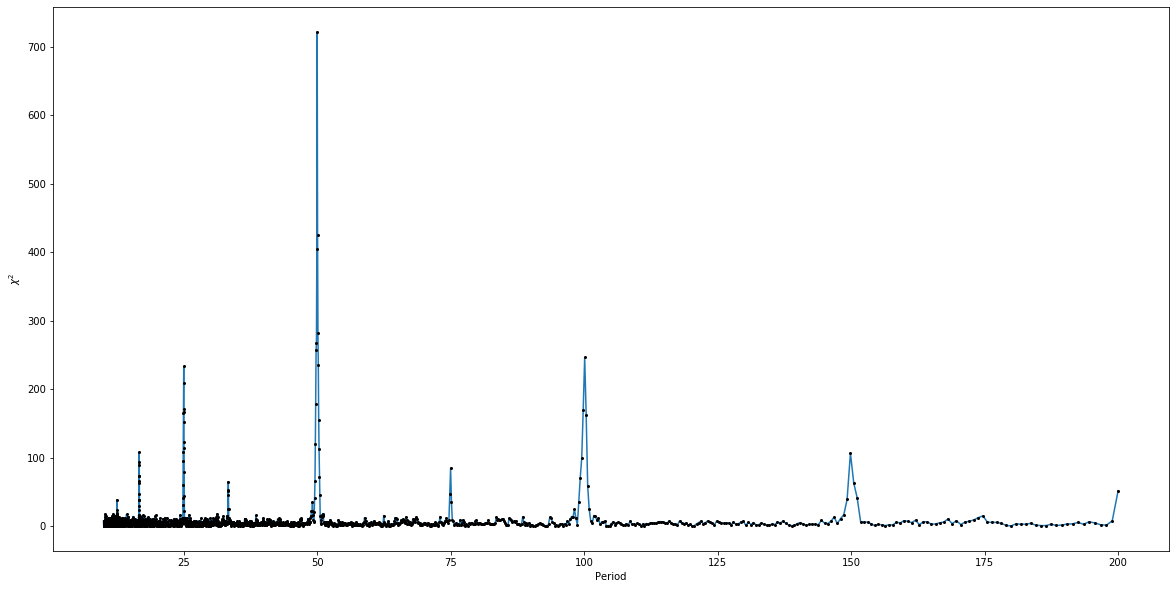

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(per, stat)
plt.plot(per, stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()

# Поиск периодичностей

In [27]:
from search_period import periods_statistic, chi_2, fold

In [33]:
per, stat = periods_statistic(evnts_sin, chi_2, fold, 5, 10, 200)

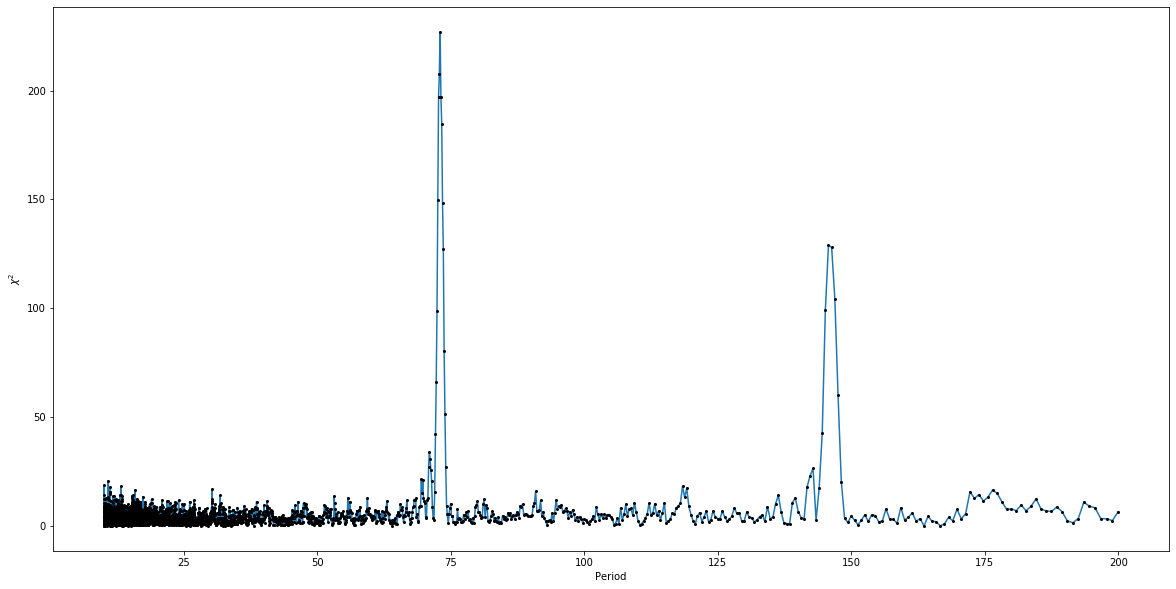

In [34]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(per, stat)
plt.plot(per, stat, 'ko', markersize=2)
plt.xlabel('Period')
plt.ylabel('$\chi^2$')
plt.show()

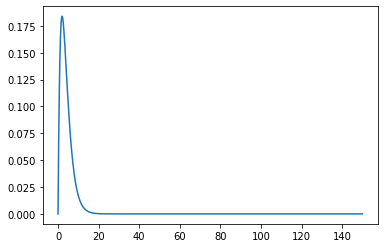

0.08950743891988437

In [35]:
from scipy.stats import chi2
x = np.linspace(0, 150, 1000)
plt.plot(x, chi2.pdf(x,4))
plt.show()
chi2.pdf(stat[171],4)

In [36]:
per[np.argmax(stat)]
np.max(stat)
stat[171]

5.442903752039152